In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import vgg16
import utils
%matplotlib inline

F:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Original iamge shape (600, 600, 3)
After load shape (224, 224, 3)


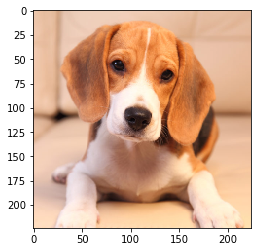

In [2]:
origin_shape,image1 = utils.load_image('./test_data/dog.png')

print('Original iamge shape',origin_shape)
print('After load shape',image1.shape)

batch = image1.reshape((1,224,224,3))

image1_show = plt.imshow(image1)

In [ ]:
with tf.device('/gpu:0'):
    with tf.Session() as sess:
        images = tf.placeholder(tf.float32,[1,224,224,3])
        feed_dict = {images:batch}
        
        vgg = vgg16.Vgg16()
        with tf.name_scope('content_vgg'):
            vgg.build(images)
            
        prob = sess.run(vgg.prob,feed_dict=feed_dict)
        top5 = np.argsort(prob[0])[-1:-6:-1]
        
        for n, label in enumerate(top5):
            print (label)
        pool1 = sess.run(vgg.pool1,feed_dict=feed_dict)
        print(pool1.shape)
        conv3_3 = sess.run(vgg.conv3_3,feed_dict=feed_dict)
        print(conv3_3.shape)

build model finished: 0s


In [8]:
vgg = vgg16.Vgg16()
print(vgg.data_dict.keys())

dict_keys(['conv5_1', 'conv3_1', 'conv2_1', 'fc8', 'conv4_2', 'conv4_1', 'fc7', 'conv5_3', 'conv2_2', 'conv3_2', 'conv4_3', 'fc6', 'conv3_3', 'conv1_2', 'conv1_1', 'conv5_2'])


In [9]:
filter_conv1_1 = vgg.get_conv_filter('conv1_1')
print('filter conv1_1', filter_conv1_1.shape)

filter conv1_1 (3, 3, 3, 64)


In [10]:
tf.Print(filter_conv1_1[:,:,:,:5],[filter_conv1_1[:,:,:,:5]])

<tf.Tensor 'Print:0' shape=(3, 3, 3, 5) dtype=float32>

In [11]:
filter_conv1_2 = vgg.get_conv_filter('conv1_2')
print('filter conv1_2', filter_conv1_2.shape)

filter conv1_2 (3, 3, 64, 64)
